In [2]:
import a3_4
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X_train, y_train, X_test, y_test = a3_4.load_data()

In [4]:
# Randomize train
seed = 42
np.random.seed(seed)
r = np.random.permutation(len(X_train))
X_train, y_train = X_train[r, :], y_train[r]

In [5]:
# Normalize
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print(X_train.shape)
print(X_train[0].reshape(-1,1).shape)
print(X_train[0].shape)
print(X_train[0].reshape(28,28).shape)
print(X_train[0].shape)

In [14]:
for i in range(0,16):
    plt.figure()
    plt.imshow(X_train[i].reshape(28,28))
    plt.show()

(60000, 784)


A3, Ex4.1
randomize_data


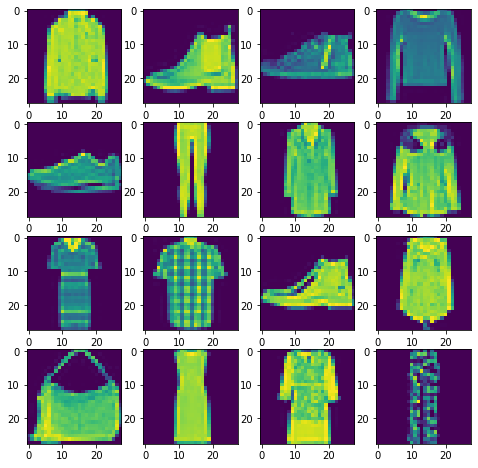

In [22]:
# Ex 1
a3_4.ex_4_1(X_train, y_train, X_test, y_test)

In [6]:
# Ex 2
num_reduced = 60000
X_train_reduced = X_train[:num_reduced,:]
y_train_reduced = y_train[:num_reduced]
print(X_train_reduced.shape, y_train_reduced.shape)

(60000, 784) (60000,)


In [7]:
clf = MLPClassifier(early_stopping=False)

In [ ]:
clf.fit(X_train_reduced,y_train_reduced)
# 2000, .7661
# 8000, .8143
# 12000, .8404
# 20000, .8428
# 40000, .848
# 60000, .848
print(clf.score(X_test,y_test))

In [58]:
clf = MLPClassifier(early_stopping=True, hidden_layer_sizes=(1000,) )
clf.fit(X_train_reduced,y_train_reduced)
clf.score(X_test,y_test)

0.8825

In [59]:
clf = MLPClassifier(early_stopping=True, hidden_layer_sizes=(350,50,) )
clf.fit(X_train_reduced,y_train_reduced)
clf.score(X_test,y_test)

0.8852

In [68]:
# Ex 3

from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
class_names = [0,1,2,3,4,5,6,7,8,9]
print(confusion_matrix(y_test,predictions,class_names))

[[880   0  12  18   1   1  81   0   7   0]
 [  1 985   0  10   0   0   2   0   2   0]
 [ 12   1 835  18  67   0  64   0   3   0]
 [ 20  10   5 936   8   1  19   0   1   0]
 [  2   2  71  55 810   0  58   0   2   0]
 [  0   0   0   1   0 944   1  34   2  18]
 [121   2  65  34  39   0 734   0   5   0]
 [  0   0   0   0   0   7   0 950   0  43]
 [  4   0   3   3   2   1   3   1 983   0]
 [  0   0   0   0   0   5   0  25   1 969]]


In [8]:
import assignment_3_funcs as as3f

In [35]:
svc_param = [{'hidden_layer_sizes':[(10,),(100,),(1000,)], 'early_stopping':[False]}]
gscv = as3f.grid_search_SVC(X_train_reduced,y_train_reduced, MLPClassifier, 5, svc_param)

grid_search_SVC [{'hidden_layer_sizes': [(10,), (100,), (1000,)], 'early_stopping': [False]}]
0.7945,{'early_stopping': False, 'hidden_layer_sizes': (1000,)}


In [36]:
svc_param = [{'hidden_layer_sizes':[(10,10),(100,10),(1000,10)], 'early_stopping':[False]}]
gscv = as3f.grid_search_SVC(X_train_reduced,y_train_reduced, MLPClassifier, 5, svc_param)

grid_search_SVC [{'hidden_layer_sizes': [(10, 10), (100, 10), (1000, 10)], 'early_stopping': [False]}]
0.256,{'early_stopping': False, 'hidden_layer_sizes': (10, 10)}


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
svc_param = [{'hidden_layer_sizes':[(10,100),(100,10),(1000,10)], 'early_stopping':[False]}]
gscv = as3f.grid_search_SVC(X_train_reduced,y_train_reduced, MLPClassifier, 5, svc_param)

grid_search_SVC [{'hidden_layer_sizes': [(10, 100), (100, 10), (1000, 10)], 'early_stopping': [False]}]
0.5015,{'early_stopping': False, 'hidden_layer_sizes': (10, 100)}


In [45]:
svc_param = [{'hidden_layer_sizes':[(10,),(100,),(1000,)],
              'early_stopping':[True],
              'activation':['tanh','relu','logistic']
             }]
gscv = as3f.grid_search_SVC(X_train_reduced,y_train_reduced, MLPClassifier, 5, svc_param)

grid_search_SVC [{'hidden_layer_sizes': [(10,), (100,), (1000,)], 'early_stopping': [True], 'activation': ['tanh', 'relu', 'logistic']}]
0.8341,{'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': (1000,)}


In [47]:
svc_param = [{'hidden_layer_sizes':[(1000,),(10,100,),(100,100,),(1000,100,),],
              'early_stopping':[True],
              'activation':['tanh','relu','logistic']
             }]
gscv = as3f.grid_search_SVC(X_train_reduced,y_train_reduced, MLPClassifier, 5, svc_param)

grid_search_SVC [{'hidden_layer_sizes': [(1000,), (10, 100), (100, 100), (1000, 100)], 'early_stopping': [True], 'activation': ['tanh', 'relu', 'logistic']}]
0.835,{'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': (1000,)}


In [50]:
clf = gscv.best_estimator_
clf.score(X_test,y_test)

0.8253

In [55]:
svc_param = [{'hidden_layer_sizes':[(1000,),(350,50)],
              'early_stopping':[True],
              'activation':['relu']
             }]
gscv = as3f.grid_search_SVC(X_train,y_train, MLPClassifier, 5, svc_param)

grid_search_SVC [{'hidden_layer_sizes': [(1000,), (350, 50)], 'early_stopping': [True], 'activation': ['relu']}]
0.8986166666666666,{'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': (1000,)}


In [11]:
svc_param = [{'hidden_layer_sizes':[(1000,)],
              'early_stopping':[True],
              'activation':['relu'],
              'alpha':[.1,10,.001]
             }]
gscv = as3f.grid_search_SVC(X_train,y_train, MLPClassifier, 3, svc_param)

grid_search_SVC [{'hidden_layer_sizes': [(1000,)], 'early_stopping': [True], 'activation': ['relu'], 'alpha': [0.1, 10, 0.001]}]
0.8924499999999999,{'activation': 'relu', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (1000,)}


In [12]:
clf = gscv.best_estimator_
clf.score(X_test,y_test)

0.9038

In [14]:
clf = MLPClassifier(early_stopping=True,hidden_layer_sizes=(1000,),alpha=.001)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
predictions = clf.predict(X_test)

0.9015


NameError: name 'confusion_matrix' is not defined

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[908   1   7  11   2   0  67   0   4   0]
 [  1 988   0   9   0   1   1   0   0   0]
 [ 27   1 768  13 127   1  61   0   2   0]
 [ 22  14   4 917  28   1  12   0   2   0]
 [  3   1  31  17 914   0  31   0   3   0]
 [  0   0   1   1   0 952   0  28   3  15]
 [158   4  47  19  86   0 679   0   7   0]
 [  0   0   0   0   0   8   0 944   0  48]
 [  3   0   7   3   1   0   6   2 977   1]
 [  1   0   0   0   0   3   0  28   0 968]]


In [18]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [20]:
print (accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions)) 

0.9015
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1000
         1.0       0.98      0.99      0.98      1000
         2.0       0.89      0.77      0.82      1000
         3.0       0.93      0.92      0.92      1000
         4.0       0.79      0.91      0.85      1000
         5.0       0.99      0.95      0.97      1000
         6.0       0.79      0.68      0.73      1000
         7.0       0.94      0.94      0.94      1000
         8.0       0.98      0.98      0.98      1000
         9.0       0.94      0.97      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [34]:
print(np.unique(y_test,return_counts=True))

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


In [37]:
print(clf.loss_curve_)

[0.5191204928346361, 0.3898792769528779, 0.3404346002858327, 0.3201256259588485, 0.3006740463978604, 0.2821512304688442, 0.2720769129475797, 0.2579171323075201, 0.24822850205525052, 0.2378109719712684, 0.22756312948010413, 0.2213202820243613, 0.2132561561504392, 0.20599499783002628, 0.1979883543302466, 0.19725414539082395, 0.18857057265239593, 0.18248936476712047, 0.17599993042011927, 0.1738889395499137, 0.16592674934746485, 0.1608950706075451, 0.15973305200486357, 0.15100563107697473, 0.1507472885192991, 0.14389287736528814, 0.14220166053550834, 0.14033414503290037, 0.13764339250153268]


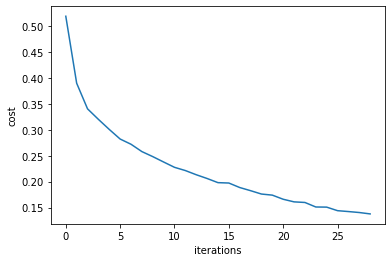

In [38]:
plt.ylabel('cost')
plt.xlabel('iterations')
plt.plot(clf.loss_curve_)
plt.show()